This the notebook to reproduce our results. The sections are made independent so they can be ran without running previous RQs.

# RQ1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
def pdf(a, b, t, r):
    from scipy.special import beta
    alpha_ = (t/ b)**a
    beta_ = ((1-t)/(1-b))**a

    return ((r**(alpha_ - 1)) * ((1 - r)**(beta_ - 1)))/beta(alpha_, beta_)

def response(a, b, t):
    return 1 / (1 + ((b/(1 - b))**a) * ((t / (1 - t))**(-a)) )

In [5]:
type_ = 'HE' # Choose between 'HE' for HumanEval or 'CE' for ClassEval

assert type_ in ['HE', 'CE'], f"Should be 'HE' or 'CE' but got {type_}"

if type_ == 'HE':
    slice_ = np.arange(164)
else:
    slice_ = np.arange(164, 364)
    #samp = pd.read_csv(os.path.join('..', 'data', 'ClassEval', 'sampled_tasks.csv'), sep=';')
    
diff = np.load(os.path.join('..', 'data', 'irt_data', f'diff_all_tasks_test_{type_}.npy'))
disc = np.load(os.path.join('..', 'data', 'irt_data', f'disc_all_tasks_test_{type_}.npy'))
ab = np.load(os.path.join('..', 'data', 'irt_data', f'ab_all_tasks_test_{type_}.npy'))
responses = np.load(os.path.join('..', 'data', 'irt_data', 'test_data_all.npy'))[slice_].T


my_dat = np.zeros((5, len(disc)))
for i in range(len(ab)):
    my_dat[i] = response(disc, diff, ab[i])

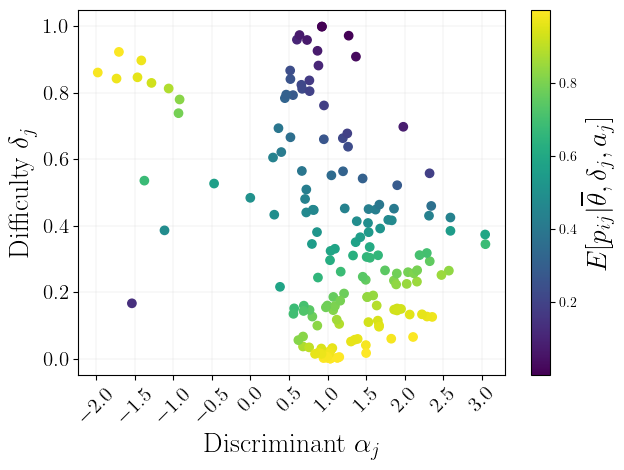

In [9]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": "cm",
    "text.usetex": True})
plt.scatter(disc, diff, c=response(disc, diff, np.mean(ab)))#my_dat[:,pos].mean(axis=0))
cb = plt.colorbar(cmap='veridis')
cb.set_label('$E[p_{ij} | \\overline{\\theta}, \\delta_j, a_j]$', fontsize=20)
plt.xlabel('Discriminant $\\alpha_j$', fontsize=20)
plt.ylabel('Difficulty $\\delta_j$', fontsize=20)
plt.xticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], rotation=45, fontsize=15)
plt.yticks(fontsize=15)

#plt.ylim(0, 1)
plt.tight_layout()
plt.rc('axes', axisbelow=True)
plt.grid(True, color='lightgrey', linewidth=0.2)
#plt.savefig('disc_vs_diff_HE.pdf', dpi=600)
plt.show()

In [ ]:
# Filtering tasks that were ambiguous (see paper)
if type_ == 'HE':
    filtered_ = [50]
else:
    filtered_ = [23, 71, 90, 115, 118, 152, 160]

good = [ind for ind in range(len(disc)) if ind not in filtered_]
my_dat = np.zeros((5, len(good)))
for i in range(len(ab)):
    my_dat[i] = response(disc[good], diff[good], ab[i])

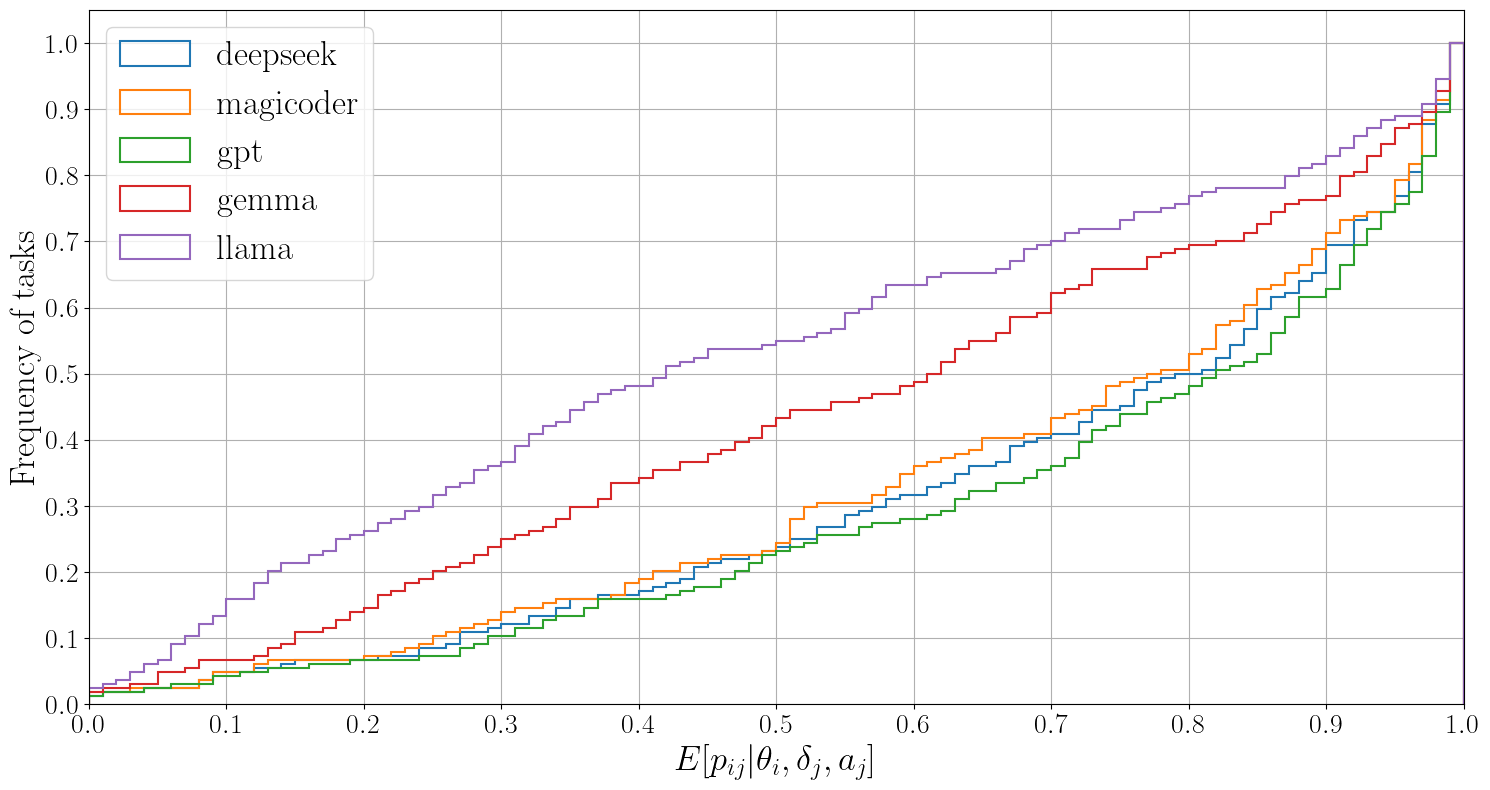

In [10]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": "cm",
    "text.usetex": True})
fig = plt.figure(figsize=(15, 8))
bins = np.arange(0, 1.01, 0.01)
models = ['deepseek', 'magicoder', 'gpt', 'gemma', 'llama']
for i in range(len(my_dat)):
    plt.hist(my_dat[i], bins = bins, cumulative = True, density=True, histtype='step', label=models[i], linewidth=1.5)

plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=20)
plt.xlabel('$E[p_{ij} | \\theta_i, \\delta_j, a_j]$', fontsize=25)
plt.ylabel('Frequency of tasks', fontsize=25)
plt.legend(fontsize=25)
plt.grid(True)
plt.tight_layout()
#plt.savefig('cum_humanevalplus.pdf', dpi=600)
plt.show()

# RQ2

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
type_ = 'CE' # Choose between 'HE' for HumanEval or 'CE' for ClassEval
assert type_ in ['HE', 'CE'], f"Should be 'HE' or 'CE' but got {type_}"
topics = pd.read_csv(os.path.join('..', 'data', 'humanevalplus' if type_ == 'HE' \
                                  else 'classeval', 'topics_' + ('humanevalplus' if type_ == 'HE' else 'classeval') + '.csv'), sep=';')
tasks = topics['Task']

In [34]:
topics

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Topic,Count,Name,Representation,Representative_Docs,Task,LLM-Easy (Global),...,LLM-Easy (Llama),LLM-Hard (Llama),LLM-Easy (Deepseek),LLM-Hard (Deepseek),LLM-Easy (MagiCoder),LLM-Hard (MagiCoder),LLM-Easy (CodeGemma),LLM-Hard (CodeGemma),LLM-Easy (GPT),LLM-Hard (GPT)
0,0,0,0,0,20,0_game_player_map_score_cards,"['game', 'player_map', 'score', 'cards', 'chec...",['Determines the winner of a game by comparing...,"33, 38, 41, 60, 61, 75, 79, 84, 85, 88, 90, 11...","33,38,41,60,79,84,85,88,113,125,158,162,188,194",...,"33,38,41,60,79,84,85,88,113,125,158,162,186,18...","61,75,90,189,197","33,38,41,60,79,84,88,113,125,158,162,188,194","61,75,85,90,186,189,197","33,38,41,60,79,84,85,88,113,125,158,162,188,18...","61,75,90,186,197","33,38,41,60,79,84,85,88,113,125,158,162,186,18...","61,75,90,189","33,38,41,60,61,79,84,85,88,113,125,158,162,188...","75,90,186,189,197"
1,1,1,1,1,17,1_cash_balance_amount_exchange_currency,"['cash_balance', 'amount', 'exchange', 'curren...","['Sell a specific ""stock"" and update ""self.por...","9, 25, 46, 62, 65, 86, 87, 95, 100, 107, 109, ...","9,25,46,62,65,86,87,95,100,107,109,119,135,143...",...,"46,62,65,86,95,100,107,109,119,135,143,145,147...","9,25,87","9,25,62,65,86,87,95,100,107,109,119,135,143,14...",46,"9,25,46,62,65,86,87,95,100,107,109,135,143,145...",119,"9,25,46,62,65,86,87,95,100,107,109,119,135,143...",NaN,"9,46,62,65,86,87,95,100,107,109,119,135,143,14...",25
2,2,2,2,2,13,2_ip_address_ipv4_ip_html_text,"['ip_address', 'ipv4', 'ip', 'html_text', 'com...",['Determine if the IP address is valid by chec...,"29, 45, 48, 49, 94, 103, 131, 146, 156, 159, 1...","48,49,94,103,131,159,164,182,198",...,"48,49,94,103,131,146,159,164,182,198","29,45,156","48,49,94,103,131,159,164,182,198","29,45,146,156","48,49,94,103,131,146,159,164,182,198","29,45,156","48,49,94,103,131,159,164,182,198","29,45,146,156","48,94,103,131,146,159,164,182,198","29,45,49,156"
3,3,3,3,3,12,3_interpolation_calculate_computed_compute,"['interpolation', 'calculate', 'computed', 'co...","[' Calculate the calorie intake based on ""BMR""...","3, 5, 19, 30, 36, 40, 50, 96, 140, 165, 181, 183","3,96,181,183",...,"3,181,183","5,19,30,36,40,50,96,140,165","3,30,96,165,181,183","5,19,36,40,50,140","3,96,165,181,183","5,19,30,36,40,50,140","3,96,181,183","5,19,30,36,40,50,140,165","3,30,96,181,183","5,19,36,40,50,140,165"
4,4,4,4,4,11,4_stop_word_list_word_list_sentences_string_pu...,"['stop_word_list', 'word_list', 'sentences_str...","['Remove punctuations from the input ""sentence...","0, 4, 13, 22, 24, 71, 83, 115, 116, 153, 180","0,4,13,22,24,83,116,180",...,"4,13,22,83,116","0,24,71,115,153,180","0,4,13,22,24,83,116,153,180","71,115","0,4,13,22,116,180","24,71,83,115,153","0,4,13,22,24,83,116,180","71,115,153","0,4,13,22,24,83,116,153,180","71,115"
5,5,5,5,5,10,5_save_file_name_output_file_name_file_name_ou...,"['save_file_name', 'output_file_name', 'file_n...",['Modify the data in XML elements by capitaliz...,"14, 37, 47, 63, 73, 111, 118, 167, 176, 192","37,63,73,111,167,176,192",...,"37,63,111,167,176,192","14,47,73,118","37,63,73,111,167,176,192","14,47,118","37,63,73,111,167,176,192","14,47,118","37,63,73,111,118,167,176,192","14,47","37,63,73,111,167,176,192","14,47,118"
6,6,6,6,6,9,6_permutations_algorithm_combinations_factorial,"['permutations', 'algorithm', 'combinations', ...",['Counts the total number of all possible arra...,"8, 34, 72, 98, 144, 154, 169, 187, 196","8,72,98,144,154,169,187",...,"8,72,98,144,154,169,187","34,196","8,34,98,144,154,169,187","72,196","8,34,72,98,144,154,169,187",196,"8,98,144,154,187","34,72,169,196","8,72,98,144,154,169,187,196",34
7,7,7,7,7,9,7_calculate_decimal_median_calculated,"['calculate', 'decimal', 'median', 'calculated...","['Calculate the median of a group of data ""dat...","16, 23, 31, 59, 78, 80, 129, 163, 195","16,31,78,80,129,163",...,"16,23,31,78,80,129,163","59,195","16,31,78,80,129,163","23,59,195","16,31,78,80,129,163","23,59,195",

In [36]:
def response(a, b, t):
    return 1 / (1 + ((b/(1 - b))**a) * ((t / (1 - t))**(-a)) )

slice_ = np.arange(164, 364) if type_ == 'CE' else np.arange(0, 164)
filter_ = [7, 23, 71, 90, 115, 118, 152, 160] if type_ == 'CE' else [50]

diff = np.load(os.path.join('..', 'data', 'irt_data', f'diff_all_tasks_test_{type_}.npy'))
disc = np.load(os.path.join('..', 'data', 'irt_data', f'disc_all_tasks_test_{type_}.npy'))
ab = np.load(os.path.join('..', 'data', 'irt_data', f'ab_all_tasks_test_{type_}.npy'))
responses = np.load(os.path.join('..', 'data', 'irt_data', 'test_data_all.npy')).T
responses = responses[:, slice_]

my_dat = np.zeros((5, 164 if type_ =='HE' else 200))
for i in range(len(ab)):
    my_dat[i] = 1 - response(disc, diff, ab[i])

diff = np.array([d if disc[ind] > 0 else 1 - d for (ind, d) in enumerate(diff)]) # 1 - diff for task with negative discriminant for proper comparison (see paper)

In [37]:
# Getting the difficulty/discriminant/expected answer per topic
models = ['deepseek', 'magicoder', 'gpt', 'gemma', 'llama']

resp_per_topics = [[] for _ in range(len(models))]
diff_per_topics = []
disc_per_topics = []
for t in tasks:
    filtered_task = [e for e in np.array(t.split(",")).astype(int) if e not in filter_]
    for ind, m in enumerate(responses[:, filtered_task]):
        resp_per_topics[ind].append(m)
    
    diff_per_topics.append(diff[filtered_task])
    disc_per_topics.append(disc[filtered_task])

median_resp_per_topics = np.zeros((len(models), len(resp_per_topics[0])))
for i in range(len(models)):
    for j in range(len(resp_per_topics[i])):
        median_resp_per_topics[i, j] = np.mean(resp_per_topics[i][j])

median_diff_per_topics = []
for i in range(len(diff_per_topics)):
    median_diff_per_topics.append(np.mean(diff_per_topics[i]))

median_disc_per_topics = []
for i in range(len(disc_per_topics)):
    median_disc_per_topics.append(np.mean(disc_per_topics[i]))

median_per_topics = np.vstack((median_resp_per_topics, median_diff_per_topics, median_disc_per_topics))
print(median_per_topics.shape)

(7, 21)


In [38]:
# Names of the topics:

if type_ == 'HE':
    names_col = ["Counting/splitting words in strings (0)",
    "Integer calculations with constraints (1)",
    "Prime number calculations (2)",
    "Sorting lists with constraints (3)",
    "Special patterns in strings (4)",
    "Strings to numbers (5)",
    "Arithmetics with polynomials (6)",
    "Encoding/Decoding strings (7)",
    "Sequences (8)",
    "Grid problems (9)",
    "Numeric calculations (10)",
    "Min \& Max in lists with constraints (11)",
    "Nested parentheses/brackets (12)",
    "Products with constraints (13)",
    "Replacements in strings (14)",
    "Duplicates in lists (15)",
    "Coding-competition like problems (16)"]
else:
    names_col = ["Games functionality (0)",
    "Getters (1)",
    "Condition checking (2)",
    "Data structure calculations (3)",
    "Strings processing (4)",
    "Files processing (5)",
    "Intergers maths (6)",
    "Statistics (7)",
    "SQL request (8)",
    "Converting data formats (9)",
    "Users' information processing (10)",
    "Complex structure processing (11)",
    "Data structure items removal (12)",
    "Files reading (13)",
    "Text encryption/decryption (14)",
    "Data structure items additions (15)",
    "Strings replacements (16)",
    "Data structure information retrieval (17)",
    "Temperature processing (18)",
    "Strings assessment (19)",
    "Data structure update (20)"]

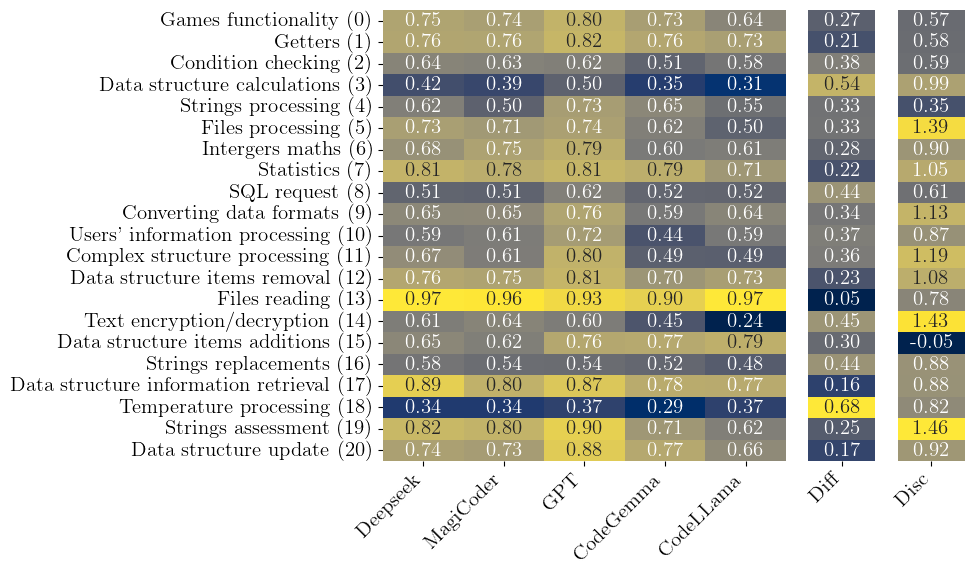

In [39]:
plt.rcParams.update({
    "font.size":15,
    "text.usetex": True})

# Create subplots with different width ratios
fig, (ax, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 6), gridspec_kw={'width_ratios': [6, 1, 1]})
fig.subplots_adjust(wspace=0.01)

# Plot the heatmap
sns.heatmap(median_per_topics[:5].T, annot=True, cmap='cividis', cbar=False, ax=ax, fmt='.2f')
ax.set_yticklabels(names_col, rotation=0)
ax.set_xticklabels(['Deepseek', 'MagiCoder', 'GPT', 'CodeGemma', 'CodeLLama'], rotation=45, ha="right")

sns.heatmap(median_per_topics[5:6].T, annot=True, cmap='cividis', cbar=False, ax=ax2, fmt='.2f')
ax2.set_yticks([])
ax2.set_xticklabels(['Diff'], rotation=45, ha="right")

sns.heatmap(median_per_topics[6:].T, annot=True, cmap='cividis', cbar=False, ax=ax3, fmt='.2f')
ax3.set_yticks([])
ax3.set_xticklabels(['Disc'], rotation=45, ha="right")

# Save and show the plot
plt.tight_layout()
#plt.savefig(f'topics_{data_}.pdf', dpi=600)
plt.show()


# RQ3

**Note**: This section requires to have run the AST parse script first (see README)

In [119]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import kendalltau, spearmanr, mannwhitneyu, anderson_ksamp

In [120]:
type_ = 'CE' # Choose between 'HE' for HumanEval or 'CE' for ClassEval
assert type_ in ['HE', 'CE'], f"Should be 'HE' or 'CE' but got {type_}"
models = ['deepseek', 'magicoder', 'gpt', 'gemma', 'llama']

In [121]:
dat = pd.read_json(os.path.join('..', 'data', 'humanevalplus' if type_ == 'HE' else 'classeval', \
                                'structure_types_' + ('humanevalplus' if type_ == 'HE' else 'classeval') + '.json'), orient='index')
dat = dat.loc[:, models]

In [122]:
dat

,deepseek,magicoder,gpt,gemma,llama
ClassEval_0_1,"[[def is_start_with(self, request_uri):\n p...","[[def is_start_with(self, request_uri):\n p...","[[def is_start_with(self, request_uri):\n ...","[[def is_start_with(self, request_uri):\n ...","[[def is_start_with(self, request_uri):\n p..."
ClassEval_0_2,"[[def get_jwt_user(self, request):\n """"""\n ...","[[def get_jwt_user(self, request):\n try:\n...","[[def get_jwt_user(self, request):\n to...","[[def get_jwt_user(self, request):\n """"...","[[def get_jwt_user(self, request):\n token ..."
ClassEval_10_0,[[def clean_non_binary_chars(self):\n self....,"[[def clean_non_binary_chars(self):\n """"""\n...",[[def clean_non_binary_chars(self):\n self....,[[def clean_non_binary_chars(self):\n self....,[[def clean_non_binary_chars(self):\n self....
ClassEval_10_3,"[[def convert_to_utf8(self):\n """"""\n Con...","[[def convert_to_utf8(self):\n """"""\n Con...",[[def convert_to_utf8(self):\n utf8_str...,"[[def convert_to_utf8(self):\n """"""\n ...","[[def convert_to_utf8(self):\n """"""\n Con..."
ClassEval_11_0,"[[def add(states, stat):\n if not isinstanc...","[[def add(states, stat):\n if not isinstanc...","[[def add(states, stat):\n return state...","[[def add(states, stat):\n """"""\n ...","[[def add(states, stat):\n if not stat in r..."
...,...,...,...,...,...
ClassEval_98_2,"[[def process_xml_data(self, file_name):\n ...","[[def process_xml_data(self, file_name):\n ...","[[def process_xml_data(self, file_name):\n ...","[[def process_xml_data(self, file_name):\n ...","[[def process_xml_data(self, file_name):\n ..."
ClassEval_99_2,"[[def extract_file(self, file_name, output_pat...","[[def extract_file(self, file_name, output_pat...","[[def extract_file(self, file_name, output_pat...","[[def extract_file(self, file_name, output_pat...","[[def extract_file(self, file_name, output_pat..."
ClassEval_99_3,"[[def create_zip_file(self, files, output_file...","[[def create_zip_file(self, files, output_file...","[[def create_zip_file(self, files, output_file...","[[def create_zip_file(self, files, output_file...","[[def create_zip_file(self, files, output_file..."
ClassEval_9_0,"[[def add(num1, num2):\n """"""\n Adds two ...","[[def add(num1, num2):\n """"""\n Adds two ...","[[def add(num1, num2):\n result = """"\n c...","[[def add(num1, num2):\n """"""\n Adds two ...","[[def add(num1, num2):\n return str(int(num..."


In [123]:
def response(a, b, t):
    return 1 / (1 + ((b/(1 - b))**a) * ((t / (1 - t))**(-a)) )

sampled_task = None if type_ == 'HE' else pd.read_csv(os.path.join('..', 'data', 'classeval','sampled_tasks.csv'), sep=';')
slice_ = np.arange(0, 164) if type_ == 'HE' else np.arange(164, 364)
diff = np.load(os.path.join('..', 'data', 'irt_data', f'diff_all_tasks_test_{type_}.npy'))
disc = np.load(os.path.join('..', 'data', 'irt_data', f'disc_all_tasks_test_{type_}.npy'))
ab = np.load(os.path.join('..', 'data', 'irt_data', f'ab_all_tasks_test_{type_}.npy'))

filter_ = [50] if type_ == 'HE' else sampled_task.loc[[23, 71, 90, 115, 118, 152, 160]]['class_id'].values
responses = np.load(os.path.join('..', 'data', 'irt_data', 'test_data_all.npy')).T
responses = responses[:, slice_]

my_dat = np.zeros((5, 164 if type_ == 'HE' else 200))
for i in range(len(ab)):
    my_dat[i] = 1 - response(disc, diff, ab[i])
    
diff = np.array([d if disc[ind] >= 0 else 1 - d for (ind, d) in enumerate(diff)])
disc = np.abs(disc)

In [124]:
# Get AST nodes list
import collections

models_list = list(dat.columns.values) + ['all']
count_tasks = [{} for i in range(len(models_list))]

for mod in range(len(models_list) - 1):
    for i in dat.index:
        if i in filter_ or type_ == 'CE' and i.split('ClassEval_')[-1] in filter_: # To check
            continue
        count_tasks[mod][i] = collections.Counter()
        for idx, d in enumerate(dat.loc[i][models_list[mod]]):
            loc = d[1]['loc']
            # Divide by # lines of codees
            # except for FunctionDef and arg
            d_tmp = {k: (v if k.split('_')[-1] in ['FunctionDef', 'arg'] else v/ loc)  for k, v in d[1].items()}
            d_tmp.pop('loc')
            count_tasks[mod][i].update(d_tmp) 
        
        if len(count_tasks[mod][i]) == 0:
            continue
        
        count_tasks[mod][i] = {k: v / (idx + 1) for k, v in count_tasks[mod][i].items()}

# Put them as keys
keys_ = set()
for j in range(len(count_tasks)):
    for i in count_tasks[j].keys():
        for k in count_tasks[j][i]:
            keys_.add(k)

single_keys = list(set([k.split('_')[-1] for k in keys_]))

In [125]:
quantity_to_compare = diff # Choose diff or disc to plot the table with comparison using difficulty or discriminant

to_be_added = []
for k in dat.index:
    if k not in count_tasks[0]:
        print('Skipping {}'.format(k))
        continue
        
    c = []
    for p in range(5):
        c.append(len(dat.loc[k][p]))
    # At least half the generated code have a similarity of 0.5 or more to a correct code
    if (np.array(c) >= 45).all():
        to_be_added.append(k)
    #print(c)

print(len(to_be_added)/len(dat))
relevant_keys = to_be_added #count_tasks[0].keys()

if type_ == 'HE':    
    relevant_index = list(relevant_keys)
else:
    relevant_index = []
    for k in list(relevant_keys):
        relevant_index.append(sampled_task[sampled_task['class_id'] == k.split('ClassEval_')[-1]].index[0])
print(relevant_index)

tuple_glob = []
tuple_glob_u = []
tuple_glob_u2 = []
# Removing AST nodes that are not interesting, either because:
# - there are generally already coupled with another node (e.g. Name are coupled with Assign, Call etc. 
#   as it hold the names of the functions or variables)
# - they don't bring much on their (e.g. return is in most functions, pass should not really be used etc.)
out_words = ['Continue', 'Constant', 'Index', 'Name', 'USub', 'And', 'Or', 'Add', 'Not', 'Sub', 'GtE', \
             'Gt', 'LtE', 'Lt', 'Eq', 'NotEq', 'Slice', 'Load', 'Store', 'Return', 'Mult', 'Mod', 'FloorDiv', 'NotIn', 'In', \
            'Break', 'Expr', 'arguments', 'keyword', 'alias', 'Pow', 'FormattedValue', 'JoinedStr', 'Assert', 'Div', \
             'Starred', 'IsNot', 'BitAnd', 'BitXor', 'LShift', 'Pass', 'With', 'withitem', 'Del', 'Invert', 'Is']

comp_ = kendalltau
l_glob = []
for j in range(5):
    print(models[j])
    tuple_, tuple_u, tuple_u2 = [], [], {}
    for k in single_keys:
        if k in out_words:
            continue
        # Either adding node into a same group (AugAssign with Assign, all Op together etc.)
        # or discarding redundency (GeneratorExp and ListComp both imply comprehension)
        if k in ['ImportFrom', 'AugAssign', 'BinOp', 'UnaryOp', 'GeneratorExp', 'ListComp', 'SetComp', 'DictComp', 'While', 'Dict', 'Tuple', 'Set', 'IfExp', 'ExceptHandler']:
            continue
        elif k == 'Assign':            
            nodes_list = ['Assign', 'AugAssign']
            name_k = 'Assign'
        elif k == 'BoolOp':
            nodes_list = ['BoolOp', 'BinOp', 'UnaryOp']                 
            name_k = 'Op'
        elif k == 'For':
            nodes_list = ['For', 'While']
            name_k = 'Loop'
        elif k == 'If':
            nodes_list = ['If', 'IfExp']
            name_k = 'If'
        elif k == 'List':            
            nodes_list = ['List' , 'Dict', 'Tuple', 'Set']
            name_k = 'DataStruct'
        elif k == 'Try':
            nodes_list = ['Try', 'ExceptHandler']
            name_k = 'Try-Catch'
        elif k == 'Import':
            nodes_list = ['ImportFrom', 'Import']
            name_k = 'Import'
        else:
            nodes_list = None
        
        if nodes_list is not None:
             l_ = [sum([count_tasks[j][i].get(k_node, 0) for k_node in keys_ \
                                   if k_node.split('_')[-1] in nodes_list]) for i in relevant_keys]
             corr, p = comp_(l_, quantity_to_compare[relevant_index])
            
        elif k == 'arg':
            relevant_args = []
            for i in relevant_keys:
                f_df = sum([count_tasks[j][i].get(k_node, 0) for k_node in keys_ if k_node.split('_')[-1] == 'FunctionDef'])
                c_df = sum([count_tasks[j][i].get(k_node, 0) for k_node in keys_ if k_node.split('_')[-1] == k])
                relevant_args.append(c_df/f_df)
                
            l_ = relevant_args
            corr, p = comp_(l_, quantity_to_compare[relevant_index])
            name_k = k
        else:
            l_ = [sum([count_tasks[j][i].get(k_node, 0) for k_node in keys_ \
                                  if k_node.split('_')[-1] == k]) for i in relevant_keys]
            corr, p = comp_(l_, quantity_to_compare[relevant_index])                    
            name_k = k      
        
        low_diff = np.where(quantity_to_compare[relevant_index] < np.quantile(quantity_to_compare[relevant_index], 0.5))[0] 
        high_diff = np.where(quantity_to_compare[relevant_index] >= np.quantile(quantity_to_compare[relevant_index], 0.5))[0]
        try:
            res = anderson_ksamp([np.array(l_)[low_diff], np.array(l_)[high_diff]])
            p2 = res.pvalue 
        except:
            p2 = 1
        if p < 0.1:
            tuple_.append((name_k, corr, p))
            if name_k != 'FunctionDef':
                print(np.mean(np.array(l_) == 0), name_k)
            else:
                print(np.mean(np.array(l_) == 1), name_k)
        
        
        if name_k == 'Raise':
            l_glob.append(np.where(np.array(l_) != 0)[0])

        tuple_u.append((name_k, p2))
        tuple_u2[name_k] = l_
    tuple_glob.append(sorted(tuple_, key=lambda x: abs(x[1]), reverse=True)[:10])
    tuple_glob_u.append(tuple_u)
    tuple_glob_u2.append(tuple_u2)
    print(sorted(tuple_, key=lambda x: abs(x[1]), reverse=True)[:10])
    print("Anderson: ", tuple_u)
    
fin_ = set(relevant_index)
for ind, l_ in enumerate(l_glob):
    if ind != 2:
        fin_ = fin_ & set(l_)
print(fin_.difference(set(l_glob[2])))
print(fin_, l_glob[2])
print(np.quantile(diff[relevant_index], 0.5)) #np.quantile([d for ind, d in enumerate(diff) if ind not in filter_], 0.5))

/tmp/ipykernel_190957/3049920788.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c.append(len(dat.loc[k][p]))
/tmp/ipykernel_190957/3049920788.py:100: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  res = anderson_ksamp([np.array(l_)[low_diff], np.array(l_)[high_diff]])
/tmp/ipykernel_190957/3049920788.py:100: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  res = anderson_ksamp([np.array(l_)[low_diff], np.array(l_)[high_diff]])


Skipping ClassEval_13_1
Skipping ClassEval_52_0
Skipping ClassEval_58_3
Skipping ClassEval_62_1
Skipping ClassEval_69_0
Skipping ClassEval_88_0
Skipping ClassEval_92_1
0.83
[198, 117, 64, 68, 159, 61, 197, 107, 155, 193, 175, 150, 101, 177, 1, 99, 2, 8, 187, 129, 80, 28, 11, 123, 35, 17, 7, 154, 169, 161, 184, 93, 55, 121, 145, 143, 74, 32, 163, 31, 103, 78, 16, 50, 59, 12, 147, 95, 122, 73, 79, 125, 172, 128, 192, 67, 196, 77, 183, 194, 41, 54, 127, 102, 58, 141, 124, 113, 49, 131, 164, 94, 173, 92, 114, 63, 190, 180, 22, 13, 85, 51, 96, 181, 186, 39, 185, 53, 179, 157, 27, 20, 126, 4, 116, 57, 136, 106, 89, 133, 18, 86, 119, 171, 56, 151, 144, 72, 120, 134, 162, 6, 24, 188, 158, 29, 48, 100, 25, 43, 148, 60, 38, 0, 83, 139, 142, 108, 42, 104, 82, 30, 87, 65, 166, 130, 26, 52, 10, 84, 88, 174, 70, 98, 33, 69, 46, 135, 182, 146, 81, 76, 3, 165, 168, 9, 109, 62, 137, 15, 37, 167, 176, 111, 170, 191]
deepseek
0.4578313253012048 Subscript
0.7048192771084337 comprehension
0.265060240963855

In [126]:
def sign_pval(p):
    if p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return '-'
    
unique_names = []
for i in range(5):
    for j in range(len(tuple_glob[i])):
        if str(tuple_glob[i][j][0]) not in unique_names:
            unique_names.append(str(tuple_glob[i][j][0]))

print("Node\t\t | Deepseek\t         | MagiCoder\t         | GPT3.5\t         | CodeGemma\t         | CodeLlama")
print("    \t\t |p-val          | AD\t |p-val          | AD\t |p-val          | AD\t |p-val          | AD\t |p-val          | AD\t")
for name in unique_names:
    #c = '& ' + '\\textit{' + name + '} & '
    c = name + ('\t\t |' if len(name) < 8 else '\t |')
    for i in range(5):
        corr_j = None
        for j in range(len(tuple_glob[i])):
            if tuple_glob[i][j][0]  == name:
                corr_j = j
                break
        
        corr_j2 = None
        for j in range(len(tuple_glob_u[i])):
            if tuple_glob_u[i][j][0]  == name:
                corr_j2 = j
                break
                
        if corr_j is not None:
            nb_stars = sign_pval(float(tuple_glob[i][corr_j][2]))            
            c += '{:.3f}{}'.format(tuple_glob[i][corr_j][1], nb_stars if float(tuple_glob[i][corr_j][2]) < 0.1 else '')
            for j in range(len(nb_stars) - 3):
                c += ' '
        else:
            c += '  -   '
        c += '\t |'                                      
        
        if corr_j2 is not None:
            nb_stars = sign_pval(float(tuple_glob_u[i][corr_j2][1]))
            c+= '{}'.format(nb_stars)
            for j in range(len(nb_stars) - 3):
                c += ' '
        else:
            #c += ' - &'
            c += '  -   '
        c += '\t |'
    print(c)

Node		 | Deepseek	         | MagiCoder	         | GPT3.5	         | CodeGemma	         | CodeLlama
    		 |p-val          | AD	 |p-val          | AD	 |p-val          | AD	 |p-val          | AD	 |p-val          | AD	
Op		 |0.230***	 |***	 |0.209***	 |***	 |0.207***	 |***	 |0.254***	 |***	 |0.250***	 |***	 |
comprehension	 |0.225***	 |***	 |0.195***	 |***	 |0.217***	 |***	 |0.192***	 |***	 |0.169***	 |***	 |
If		 |0.206***	 |***	 |0.207***	 |***	 |0.180***	 |**	 |0.221***	 |***	 |0.191***	 |***	 |
Subscript	 |0.181***	 |***	 |0.177***	 |***	 |0.148***	 |***	 |0.194***	 |***	 |0.175***	 |***	 |
Assign		 |0.140***	 |**	 |0.177***	 |***	 |0.179***	 |***	 |0.141***	 |**	 |0.157***	 |***	 |
Loop		 |0.126**	 |***	 |0.141**	 |***	 |0.132**	 |***	 |0.135**	 |***	 |0.145**	 |***	 |
Compare		 |0.112**	 |-	 |0.133**	 |*	 |0.103*	 |-	 |0.138***	 |-	 |0.103*	 |-	 |
Call		 |0.094*	 |*	 |0.125**	 |**	 |  -   	 |*	 |0.089*	 |*	 |  -   	 |*	 |
FunctionDef	 |  -   	 |**	 |0.163***	 |***	 |0.119*	 |-	 |0.1

# RQ4

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import anderson_ksamp
import matplotlib.pyplot as plt
import os
from sklearn.metrics import cohen_kappa_score

In [2]:
diff_human = pd.read_csv(os.path.join('..', 'data', 'humanexp', 'diff_human.csv'), index_col=0)
task_id = diff_human[['Q{}'.format(i) for i in range(1, 11)]].values
task_med = diff_human[['Q{} - Diff'.format(i) for i in range(1, 11)]].values

In [34]:
diff_human[['Q{}'.format(i) for i in range(1, 11)]]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
Tasks,,,,,,,,,,
1,150,14,42,28,35,79,120,74,27,54
2,77_3,73_4,66_1,4_1,49_3,18_1,98_2,11_1,79_4,78_0
3,162,17,50,19,99,70,8,73,36,131
4,67_2,83_3,28_1,83_0,48_2,8_1,25,75_0,19_1,0_2
5,32,147,80,132,56,59,91_1,40,151,141
6,17_5,66_0,47_0,50_2,97_1,46_0,84,37_2,32_0,93_2
7,2,58,13,126,16,140,72_1,82,9,48
8,72_7,6_0,49_0,77_2,47_1,38_1,156,1_4,20_3,79_5
9,116,139,113,65,157,127,20_0,18,64,104


In [23]:
# Getting human difficulty per task
def map_med(x):
    if x == '1':
        return 0
    elif x == '5':
        return 1
    elif x == '10':
        return 2
    elif x == '20':
        return 3
    elif x == '40':
        return 4
    elif x == '> 40':
        return 5
    else:
        raise Exception(f"Value {x} cannot be processed, should be in ['1', '5', '10', '20', '40', '> 40']")

# Getting HE tasks
diff_ind = [ind for ind, e in enumerate(task_id.flatten()) if '_' not in e]
h_diff = list(map(map_med, [str(e).strip() if '-' not in str(e) else str(e).split('-')[-1].strip() for e in task_med.flatten()[diff_ind]]))

# Getting CE tasks
diff_ind = [ind for ind, e in enumerate(task_id.flatten()) if '_' in e]
c_diff = list(map(map_med, [str(e).strip() if '-' not in str(e) else str(e).split('-')[-1].strip() for e in task_med.flatten()[diff_ind]]))


print(anderson_ksamp([h_diff, c_diff])) 
y = np.bincount(h_diff).astype('float16')
y /= len(h_diff)
y *= 100
ii = np.nonzero(y)[0]
print("Proportion of HE tasks (easy to difficult): ", list(zip(ii, y[ii])))
y = np.bincount(c_diff).astype('float16')
y /= len(c_diff)
y *= 100
ii = np.nonzero(y)[0]
print("Proportion of CE tasks (easy to difficult): ", list(zip(ii, y[ii])))
plt.show()

Anderson_ksampResult(statistic=7.094118509629201, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.001)
Proportion of HE tasks (easy to difficult):  [(0, 5.0), (1, 45.0), (2, 33.3), (3, 11.664), (4, 5.0)]
Proportion of CE tasks (easy to difficult):  [(0, 3.332), (1, 25.0), (2, 30.0), (3, 33.3), (4, 6.664), (5, 1.666)]


/tmp/ipykernel_258047/3777165300.py:27: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  print(anderson_ksamp([h_diff, c_diff]))


Anderson_ksampResult(statistic=-0.9148550064093007, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.25)


/tmp/ipykernel_258047/2421496196.py:10: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  print(anderson_ksamp([diff_o, [d for (ind, d) in enumerate(diff_h) if ind not in [50] ]]))


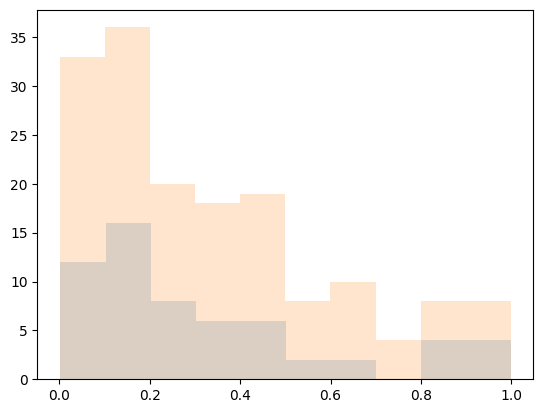

In [30]:
# Testing whether there is a difference in terms of LLM task difficulty between sampled tasks and all tasks (for HE)

type_ = 'HE'
diff_h = np.load(os.path.join('..', 'data', 'irt_data', f'diff_all_tasks_test_{type_}.npy'))
disc_h = np.load(os.path.join('..', 'data', 'irt_data', f'disc_all_tasks_test_{type_}.npy'))
diff_h = np.array([d if disc_h[ind] >= 0 else 1 - d for (ind, d) in enumerate(diff_h)])

diff_ind = [ind for ind, e in enumerate(task_id.flatten()) if '_' not in e]
diff_o = diff_h[[int(e) for e in task_id.flatten() if '_' not in e]]
print(anderson_ksamp([diff_o, [d for (ind, d) in enumerate(diff_h) if ind not in [50] ]]))
plt.hist(diff_o,alpha=0.2)
plt.hist(diff_h, alpha=0.2)
plt.show()

In [31]:
# Testing Cohen-kappa between human annotation and llms (for HE)

# This is to map LLMs [0; 1] range to {0, 1, 2, 3, 4, 5} scores
def map_diff(x):
    if x < 0.165:
        return 0
    elif x < 0.33:
        return 1
    elif x < 0.495:
        return 2
    elif x < 0.66:
        return 3
    elif x < 0.825:
        return 4
    else:
        return 5

h_diff_llms = list(map(map_diff, diff_o))

print("Cohen kappa between human and llms: ", cohen_kappa_score(h_diff, np.array(h_diff_llms), weights='linear'))
print("Cohen kappa between human (if they are underestimating) and llms: ", cohen_kappa_score(h_diff, np.array([e + 1 if e != 5 else 5 for e in h_diff_llms]), weights='linear'))
print("Cohen kappa between human (if they are overestimating) and llms: ", cohen_kappa_score(h_diff, np.array([e - 1 if e != 0 else 0 for e in h_diff_llms]), weights='linear'))


Cohen kappa between human and llms:  0.2139737991266376
Cohen kappa between human (if they are underestimating) and llms:  0.22029702970297027
Cohen kappa between human (if they are overestimating) and llms:  0.19206236711552083


Anderson_ksampResult(statistic=-0.48328175965352604, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.25)


/tmp/ipykernel_258047/580659379.py:11: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  print(anderson_ksamp([diff_o, [d for (ind, d) in enumerate(diff_c) if ind not in [50] ]]))


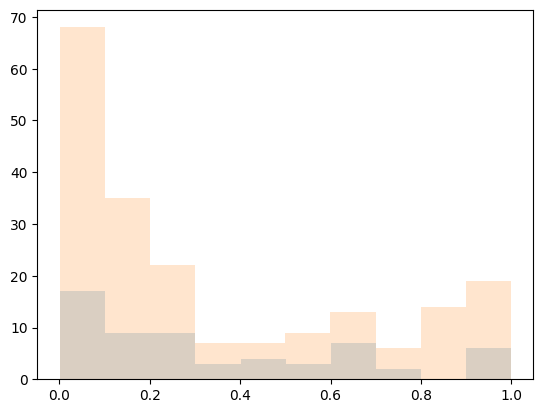

In [32]:
# Testing whether there is a difference in terms of LLM task difficulty between sampled tasks and all tasks (for CE)

type_ = 'CE'
sampled_task = None if type_ == 'HE' else pd.read_csv(os.path.join('..', 'data', 'classeval','sampled_tasks.csv'), sep=';')
diff_c = np.load(os.path.join('..', 'data', 'irt_data', f'diff_all_tasks_test_{type_}.npy'))
disc_c = np.load(os.path.join('..', 'data', 'irt_data', f'disc_all_tasks_test_{type_}.npy'))
diff_c = np.array([d if disc_c[ind] >= 0 else 1 - d for (ind, d) in enumerate(diff_c)])

diff_ind = [ind for ind, e in enumerate(task_id.flatten()) if '_' in e]
diff_o =  diff_c[[sampled_task[sampled_task['class_id'] == e].index.values[0] for e in task_id.flatten() if '_' in e]]
print(anderson_ksamp([diff_o, [d for (ind, d) in enumerate(diff_c) if ind not in [50] ]]))
plt.hist(diff_o,alpha=0.2)
plt.hist(diff_c, alpha=0.2)
plt.show()

In [33]:
# Testing Cohen-kappa between human annotation and llms (for CE)

# This is to map LLMs [0; 1] range to {0, 1, 2, 3, 4, 5} scores
def map_diff(x):
    if x < 0.165:
        return 0
    elif x < 0.33:
        return 1
    elif x < 0.495:
        return 2
    elif x < 0.66:
        return 3
    elif x < 0.825:
        return 4
    else:
        return 5

c_diff_llms = list(map(map_diff, diff_o))

print("Cohen kappa between human and llms: ", cohen_kappa_score(c_diff, np.array(c_diff_llms), weights='linear'))
print("Cohen kappa between human (if they are underestimating) and llms: ", cohen_kappa_score(c_diff, np.array([e + 1 if e != 5 else 5 for e in c_diff_llms]), weights='linear'))
print("Cohen kappa between human (if they are overestimating) and llms: ", cohen_kappa_score(c_diff, np.array([e - 1 if e != 0 else 0 for e in c_diff_llms]), weights='linear'))


Cohen kappa between human and llms:  0.13857677902621746
Cohen kappa between human (if they are underestimating) and llms:  0.1648351648351648
Cohen kappa between human (if they are overestimating) and llms:  0.11764705882352955
